In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Dummy data (100 samples, 10 features)
X = np.random.rand(100, 10)
y = np.random.randint(0, 2, size=(100, 1))

### WEIGHTS INITIALIZATION FUNCTIONS

In [ ]:
# defining glorot uniform/normal
# for tanh, sigmoid
def glorot_uniform(fan_in,fan_out):
  limit= np.sqrt(6/(fan_in+fan_out))
  return np.random.uniform(-limit,limit,size=(fan_in,fan_out))

def glorot_normal(fan_in,fan_out):
  std = np.sqrt(2 / (fan_in + fan_out))
  # loc means mean and scale means standard deviation
  return np.random.normal(loc=0.0, scale=std, size=(fan_in, fan_out))


# defining he uniform
# for ReLU
def he_uniform(fan_in,fan_out):
  limit= np.sqrt(6/(fan_in))
  return np.random.uniform(-limit,limit,(fan_in,fan_out))

def he_normal(fan_in, fan_out):
  std = np.sqrt(2 / fan_in)
  return np.random.normal(loc=0.0, scale=std, size=(fan_in, fan_out))


### ACTIVATION FUNCTIONS

In [ ]:
# defining ReLU
def relu(x):
  return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# defining tanh
def tanh(x):
  return np.tanh(x)

def tanh_derivative(x):
  return 1 - np.tanh(x) ** 2

# defining sigmoid
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    s=sigmoid(x)
    return s*(1-s)

### LOSS FUNCTIONS

In [ ]:
# defining binary cross entropy
esp=1e-7
def binary_cross_entropy(y_true,y_pred_prob):
  y_pred_prob=np.clip(y_pred_prob,esp,1-esp)
  return -(y_true*np.log(y_pred_prob)+(1-y_true)*np.log(1-y_pred_prob))

def binary_cross_entropy_derivative(y_true, y_pred_prob):
  y_pred_prob=np.clip(y_pred_prob,esp,1-esp)
  return -(y_true/y_pred_prob)+((1-y_true)/(1-y_pred_prob))


# defining mse
def mse(y_true,y_pred):
  return (y_true - y_pred)**2

def mse_derivative(y_true,y_pred):
  return 2*(y_true - y_pred)


# defining mae
def mae(y_true,y_pred):
  return np.abs(y_true - y_pred)

### ACCURACY FUNCTION

In [ ]:
threshold=0.5
def accuracy(y_true,y_pred_prob):
  y_pred=(y_pred_prob>threshold).astype(int)
  return np.mean(y_true==y_pred)

clipping is better because adding epsilion in the log or denominator changes the true probability, whereas clipping clips the values only when needed

In [ ]:
#initialising weights

#number of neurons in each layer
neurons=[X.shape[1],10,5,1]
w = []
b = []
a = []
z = []

def initializing(layers):
  global a,z,b,w
  z=[None for _ in range(layers)]
  a=[None for _ in range(layers)]
  b=[None for _ in range(layers)]
  w=[None for _ in range(layers)]

  for i in range(layers):
    w[i]=(glorot_uniform(neurons[i],neurons[i+1]))
    b[i]=(glorot_uniform(1,neurons[i+1]))

### FORWARD PROPAGATION

using `glorot_uniform` we get the weight matrices according to `fan_in` and `fan_out`

flow of data:

X -> (w1) -> Z1 -> A1 -> (w2) -> Z2 -> A2

In [ ]:

'''
FOR SINGLE LAYER(PRACTICE)

w1=glorot_uniform(10,5)
b1=glorot_uniform(1,5)
w2=glorot_uniform(5,1)
b2=glorot_uniform(1,1)
A1=0
Z1=0
A2=0
Z2=0'''

learning_rate=0.01

def forward(X,layers):
  '''
  FOR SINGLE LAYER(PRACTICE)

  global A1,Z1,A2,Z2
  Z1 = np.dot(X,w1)+b1
  A1 = relu(Z1)
  Z2 = np.dot(A1,w2)+b2
  A2 = sigmoid(Z2)
  return A2'''

  #10,5,5,1 -3 layers
  z[0]=np.dot(X,w[0])+b[0] #input layer
  a[0]=relu(z[0])

  for i in range(1,layers-1): #hidden layers
    z[i]=np.dot(a[i-1],w[i])+b[i]
    a[i]=relu(z[i])

  z[layers-1]=np.dot(a[layers-2],w[layers-1])+b[layers-1] #output layer
  a[layers-1]=sigmoid(z[layers-1])
  return a[layers-1]

### BACKPRPAGATION

- the derivative wrt to any tensor at any point is equal to the the dimension of that tensor
- parameter gradients are averaged to avoid large gradients

In [ ]:
def backward(X_train,y_train,y_pred_prob,layers):
  m=X_train.shape[0]
  '''
  FOR SINGLE LAYER(PRACTICE)

  global w1,w2,b1,b2
  dA2=binary_cross_entropy_derivative(y_train,y_pred_prob)
  dZ2=dA2*sigmoid_derivative(Z2)

  dw2 = np.dot(A1.T,dZ2)/m
  db2 = np.sum(dZ2, axis=0)/m

  dA1 = np.dot(dZ2, w2.T)
  dZ1 = dA1*relu_derivative(Z1)

  dw1 = np.dot(X_train.T, dZ1)/m
  db1 = np.sum(dZ1, axis=0)/m

  w1=w1-learning_rate*dw1
  w2=w2-learning_rate*dw2
  b1=b1-learning_rate*db1
  b2=b2-learning_rate*db2
  '''

  dz=[None for _ in range(layers)]
  da=[None for _ in range(layers)]
  db=[None for _ in range(layers)]
  dw=[None for _ in range(layers)]

  #output layer
  da[layers-1]=binary_cross_entropy_derivative(y_train,y_pred_prob) #filling them backwards -> da[0] is derivative wrt a[layers]
  dz[layers-1]=da[layers-1]*sigmoid_derivative(z[layers-1])
  dw[layers-1]=np.dot(a[layers-2].T,dz[layers-1])/m
  db[layers-1]=np.sum(dz[layers-1], axis=0)/m

  w[layers-1]-=learning_rate*dw[layers-1]
  b[layers-1]-=learning_rate*db[layers-1]

  #hidden layers
  for i in range(1,layers-1):
    da[layers-i-1]=np.dot(dz[layers-i], w[layers-i].T)
    dz[layers-i-1]=da[layers-i-1]*relu_derivative(z[layers-i-1])
    dw[layers-i-1]=np.dot(a[layers-i-2].T, dz[layers-i-1])/m
    db[layers-i-1]=np.sum(dz[layers-i-1], axis=0)/m

    w[layers-i-1]-=learning_rate*dw[layers-i-1]
    b[layers-i-1]-=learning_rate*db[layers-i-1]

  #input layer
  da[0]=np.dot(dz[1], w[1].T)
  dz[0]=da[0]*relu_derivative(z[0])
  dw[0]=np.dot(X_train.T, dz[0])/m
  db[0]=np.sum(dz[0], axis=0)/m

  w[0]-=learning_rate*dw[0]
  b[0]-=learning_rate*db[0]

### MLP MODEL

In [ ]:
losses=[]
accuracies=[]

def mlp(X,y,batch_size,epochs,layers,validation_split):
  # validation_split: the fraction of X to be used as testing data

  X = pd.DataFrame(X)
  y = pd.DataFrame(y,index=X.index)

  X_test=X.sample(frac=validation_split)
  y_test=y.loc[X_test.index]
  X_train=X.drop(X_test.index)
  y_train=y.drop(X_test.index)


  # converting it to array
  X=np.array(X)
  X_train=np.array(X_train)
  y_train=np.array(y_train)
  X_test=np.array(X_test)
  y_test=np.array(y_test)


  # get the number of samples
  samples=X_train.shape[0]

  # number of batches per epoch
  batches_per_epoch=np.ceil(samples/batch_size).astype(int)

  initializing(layers)

  for i in range(epochs):
    loss_per_batches=[]
    accuracy_per_batches=[]
    global losses,accuracies
    for j in range(batches_per_epoch):
      start=j*batch_size
      end=min((j+1)*batch_size,len(X_train))

      X_batch=X_train[start:end]
      y_batch=y_train[start:end]

      y_pred_prob=forward(X_batch,layers)

      loss_per_batches.append(np.mean(binary_cross_entropy(y_batch,y_pred_prob)))
      accuracy_per_batches.append(accuracy(y_batch,y_pred_prob))

      backward(X_batch,y_batch,y_pred_prob,layers)

    loss_epoch=np.mean(loss_per_batches)
    accuracy_epoch=np.mean(accuracy_per_batches)
    losses.append(loss_epoch)
    accuracies.append(accuracy_epoch)
    print("Epoch:",i+1," loss:",np.round(loss_epoch,4)," accuracy:",np.round(accuracy_epoch,4))

In [ ]:
mlp(X,y,32,100,3,0.2)

Epoch: 1  loss: 0.7505  accuracy: 0.5
Epoch: 2  loss: 0.7478  accuracy: 0.5
Epoch: 3  loss: 0.7453  accuracy: 0.5
Epoch: 4  loss: 0.7428  accuracy: 0.5
Epoch: 5  loss: 0.7405  accuracy: 0.5
Epoch: 6  loss: 0.7383  accuracy: 0.5
Epoch: 7  loss: 0.7362  accuracy: 0.5
Epoch: 8  loss: 0.7343  accuracy: 0.5
Epoch: 9  loss: 0.7324  accuracy: 0.5
Epoch: 10  loss: 0.7307  accuracy: 0.5
Epoch: 11  loss: 0.7291  accuracy: 0.5
Epoch: 12  loss: 0.7275  accuracy: 0.5
Epoch: 13  loss: 0.726  accuracy: 0.5
Epoch: 14  loss: 0.7246  accuracy: 0.5
Epoch: 15  loss: 0.7232  accuracy: 0.5
Epoch: 16  loss: 0.7219  accuracy: 0.5
Epoch: 17  loss: 0.7207  accuracy: 0.5
Epoch: 18  loss: 0.7196  accuracy: 0.5
Epoch: 19  loss: 0.7185  accuracy: 0.5
Epoch: 20  loss: 0.7174  accuracy: 0.5
Epoch: 21  loss: 0.7164  accuracy: 0.5
Epoch: 22  loss: 0.7154  accuracy: 0.5
Epoch: 23  loss: 0.7145  accuracy: 0.5
Epoch: 24  loss: 0.7136  accuracy: 0.5
Epoch: 25  loss: 0.7127  accuracy: 0.5
Epoch: 26  loss: 0.7119  accuracy: 

### DEMO MLP TO ANALYZE


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# MLP model
model = Sequential([
    Dense(10, activation='relu', input_shape=(10,)),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history=model.fit(X, y, epochs=100)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4835 - loss: 0.8997
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4804 - loss: 0.8520
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4700 - loss: 0.8313
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4908 - loss: 0.8042
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4950 - loss: 0.7731
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5012 - loss: 0.7592
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4470 - loss: 0.7851
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4981 - loss: 0.7391 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4960 - loss: 0.7418
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5189 - loss: 0.7165
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4793 - loss: 0.7362
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5116 - loss: 0.7197


### INFERENCES FROM REAL MODEL

DEFAULT `batch_size` IS 32, $\frac{100}{32}$ =3.125 BUT IF 3 BATCHES PER EPOCH ARE USED THEN ALL SAMPLES CAN NOT BE UTILIZED , HENCE KERAS USES `ceil()` FUNCTION ceil(3.125)=4, THE STARTING 3 BATCHES WILL HAVE 32 SAMPLES AND THE LAST (4th) BATCH WILL HAVE REMAINING 4 (=100-32x3) SAMPLES

Flow of weights and data

- All samples in a batch are processed together (matrix form)
- 1 forward pass + 1 backward pass + 1 update ,per batch
- After all 4 batches → 1 epoch is done

In [ ]:
model.get_weights()

[array([[ 0.37166503, -0.259302  ,  0.01859404, -0.27479184,  0.10101347,
          0.01312081, -0.1971171 , -0.03563022,  0.2967291 ,  0.416691  ],
        [ 0.20803118,  0.14380108,  0.46279022, -0.21220766, -0.3563875 ,
         -0.47731885,  0.09439462, -0.13761647,  0.08189932,  0.11996358],
        [ 0.39326483,  0.57058793,  0.085046  , -0.24617538,  0.18865173,
          0.5283729 , -0.13788106, -0.15266985,  0.42922613, -0.05020115],
        [ 0.24492434, -0.11156335, -0.28321296,  0.3056712 , -0.26496387,
          0.27613223, -0.4867583 , -0.1071515 ,  0.06340839,  0.3512489 ],
        [ 0.26870227,  0.31195775, -0.03221391, -0.64698565, -0.44548482,
         -0.26626018,  0.51501065, -0.17232987, -0.41348416,  0.37371382],
        [-0.14975773,  0.47090894,  0.38631123,  0.37306064,  0.06194755,
         -0.432108  , -0.2813465 , -0.21866167,  0.14627202,  0.43830192],
        [-0.11245842,  0.50232536, -0.3157947 , -0.16566724,  0.38757464,
          0.17056479,  0.2154944

- 1st array has 10 rows (`fan_in`) and 5 columns (`fan_out`) that contains weights values of 1st hidden layer
- 2nd array has 5 columns that contains values of biases for 5 neurons in the hiddden layer
- 3rd array has 5 rows (`fan_in`) and 1 column (`fan_out`) containing values for single output neuron
- 4th array contains the bias of the output neuron

### COMPARISION BETWEEN THE TWO MODELS

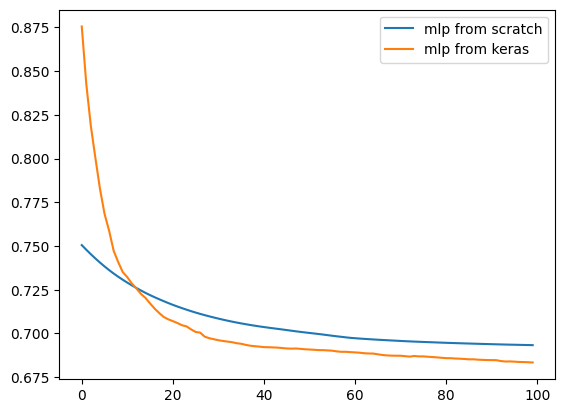

In [ ]:
sns.lineplot(losses,label='mlp from scratch')
sns.lineplot(history.history['loss'],label='mlp from keras')
plt.legend()
plt.show()

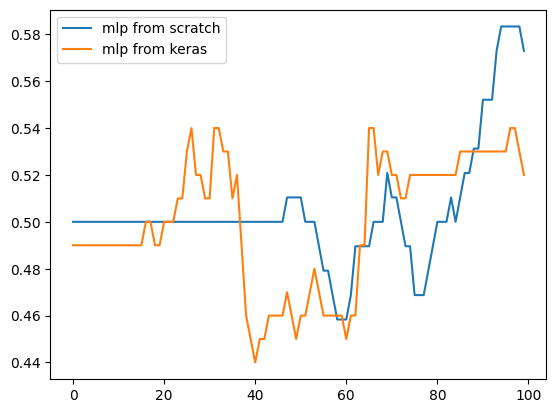

In [ ]:
sns.lineplot(accuracies,label='mlp from scratch')
sns.lineplot(history.history['accuracy'],label='mlp from keras')
plt.legend()
plt.show()